In [1]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt 
import pandas as pd
import dateparser
%matplotlib inline

In [2]:
parse_date = lambda x: dateparser.parse(x, date_formats=['%B%Y'], languages=['es'])

In [3]:
update_data = False
if update_data:
    url = 'http://www.spensiones.cl/estadisticas/series_afp/pensionados/numero_monto_promedio_pensiones_pagadas.xls'
    urlretrieve(url, "numero_monto_promedio_pensiones_pagadas.xls")

In [4]:
df = pd.read_excel("numero_monto_promedio_pensiones_pagadas.xls", skiprows=1, index_col='FECHA')

In [5]:
Totales = ['TOTAL RETIROS  PROGRAMADOS', 'TOTAL RENTAS TEMPORALES', 
           'TOTAL CUBIERTAS POR EL SEGURO', 'TOTAL RENTAS VITALICIAS PAGADAS', 
           'TOTAL RENTAS VITALICIAS INMEDIATAS', 'TOTAL RENTAS VITALICIAS DIFERIDAS', 
           'TOTAL RENTAS VITALICIAS ']

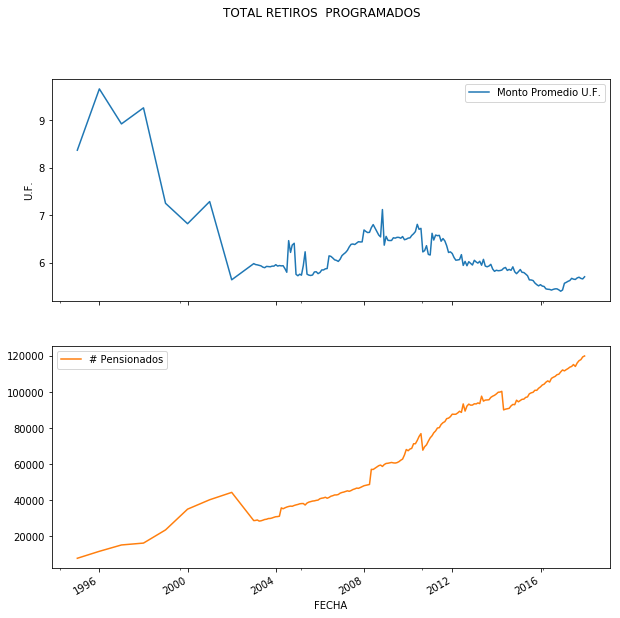

****************************************************************************************************


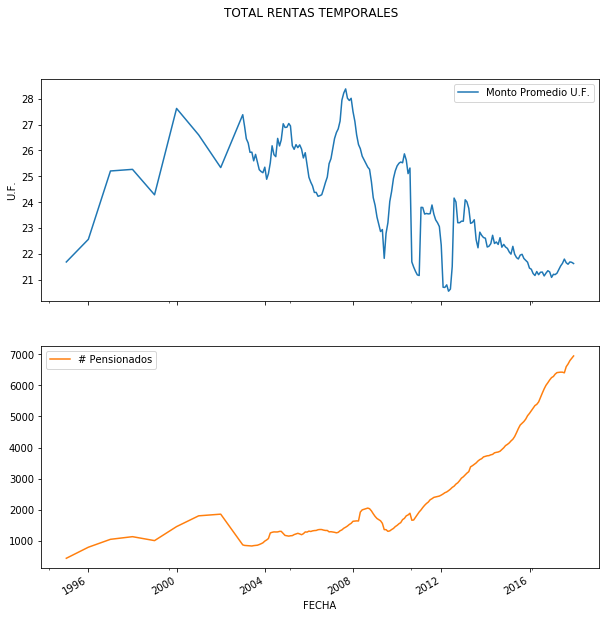

****************************************************************************************************


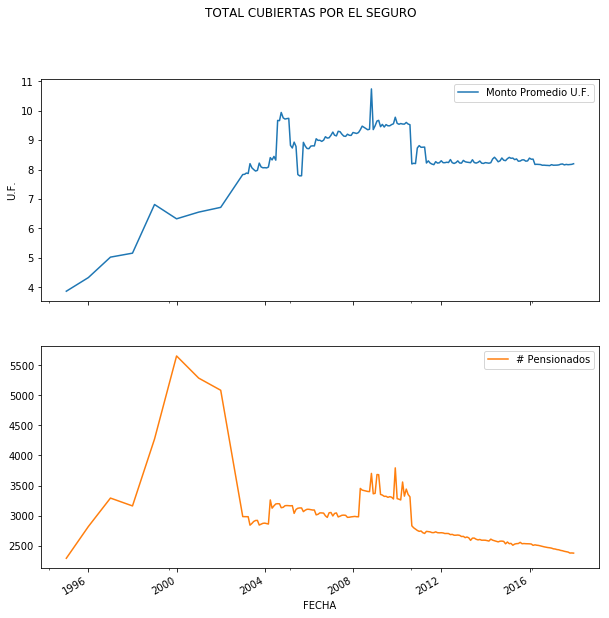

****************************************************************************************************


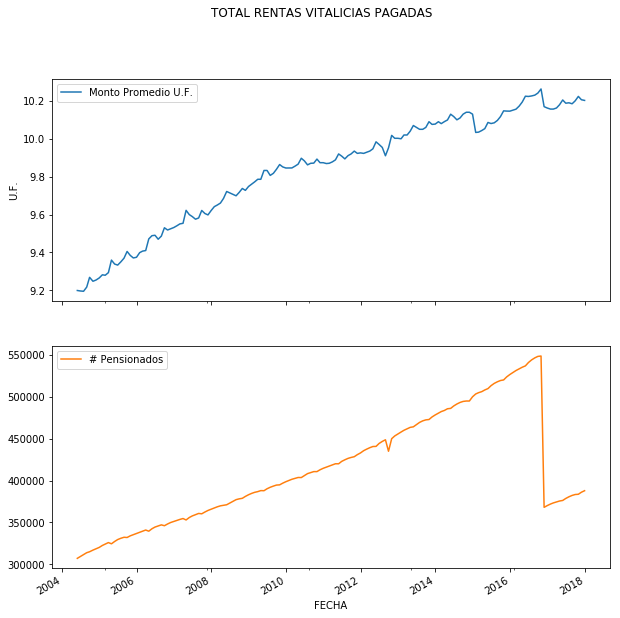

****************************************************************************************************


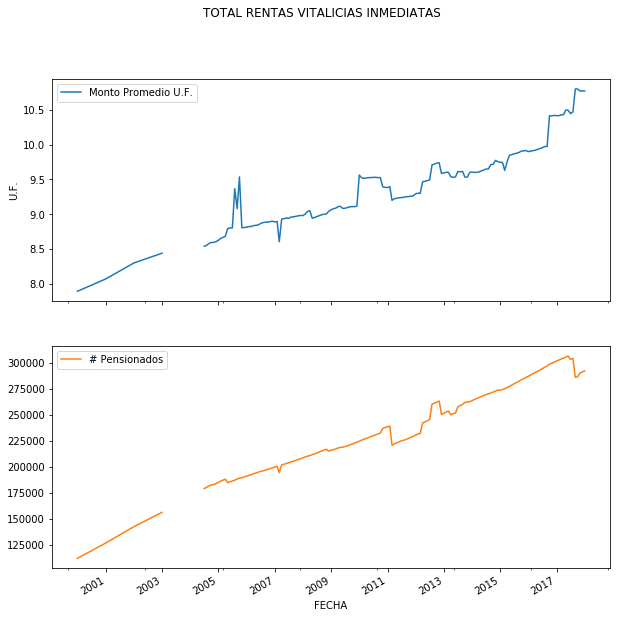

****************************************************************************************************


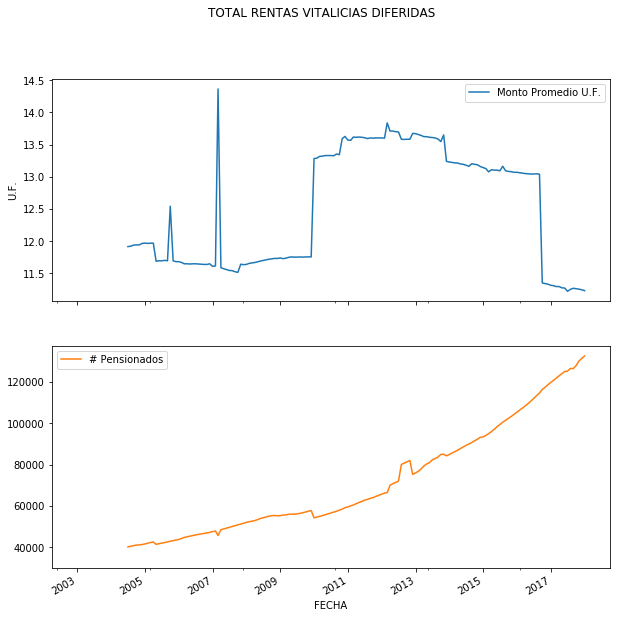

****************************************************************************************************


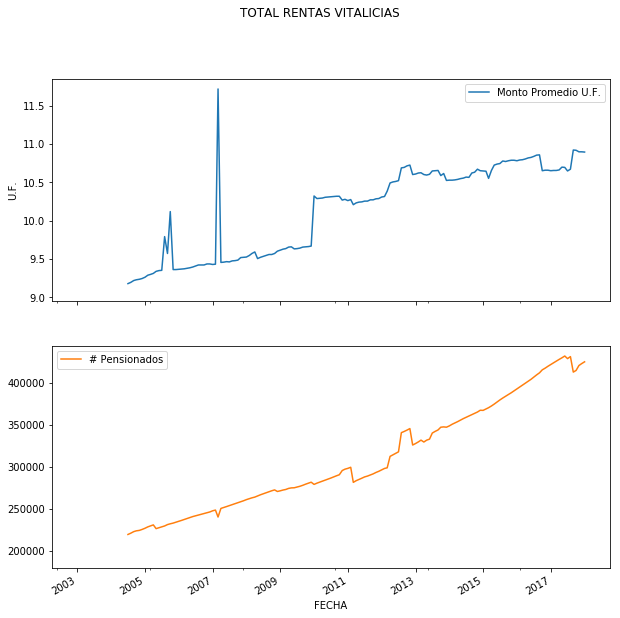

****************************************************************************************************


In [6]:
for modalidad in Totales:
    m = pd.pivot_table(df, index='FECHA', columns='Número y Monto Promedio U.F.', values=modalidad)
    m.index = m.index.map(parse_date)
    m.rename(columns={'Monto':'Monto Promedio U.F.', 'Número': '# Pensionados'}, inplace=True)
    axes = m.plot(subplots=True, figsize=(10,10), title=modalidad)
    axes[0].set_ylabel('U.F.')
    plt.show()
    print('*'*100)